# Ejercicio de regularización
_(Actualizado: 11-01-2022)_

En este ejercicio practicamos los fundamentos de la regularización L2 (ridge), en la que la minimización de la RSS con penalización tiene una forma explícita sencilla:
$$ (X^tX+\lambda I)\beta = X^ty$$
Utilizaremos los datos de una muestra sintética para conocer el verdadero modelo que tratamos de ajustar. Para ello:

## 1. 
Generar datos sintéticos para la variable dependiente. 
 
 1.1. Para ello, escribe una función de R que reciba como argumentos de entrada un vector `x` con la variable independiente, un vector de parámetros ```alpha``` que contenga los coeficientes de un polinomio y una ```sigma```; y que devuelva el vector dependiente que siga la ley polinomial dada con PDF gaussiana y sigma (desviación estándar) dada: $y=\alpha_0 + \alpha_1 x + \ldots + \alpha_p x^p + \varepsilon$, con $\varepsilon\sim N(0,\sigma)$
 
 1.2. Construye un vector `x` de 40 valores distribuidos aleatoriamente entre [-3, 3] siguiendo una distribución uniforme. Úsalo con la función anterior, considerando el polinomio: $x^3 + 2 x^2 - x - 2$ y $\sigma = 4$. Representa los datos resultantes.

In [27]:
set.seed(11)

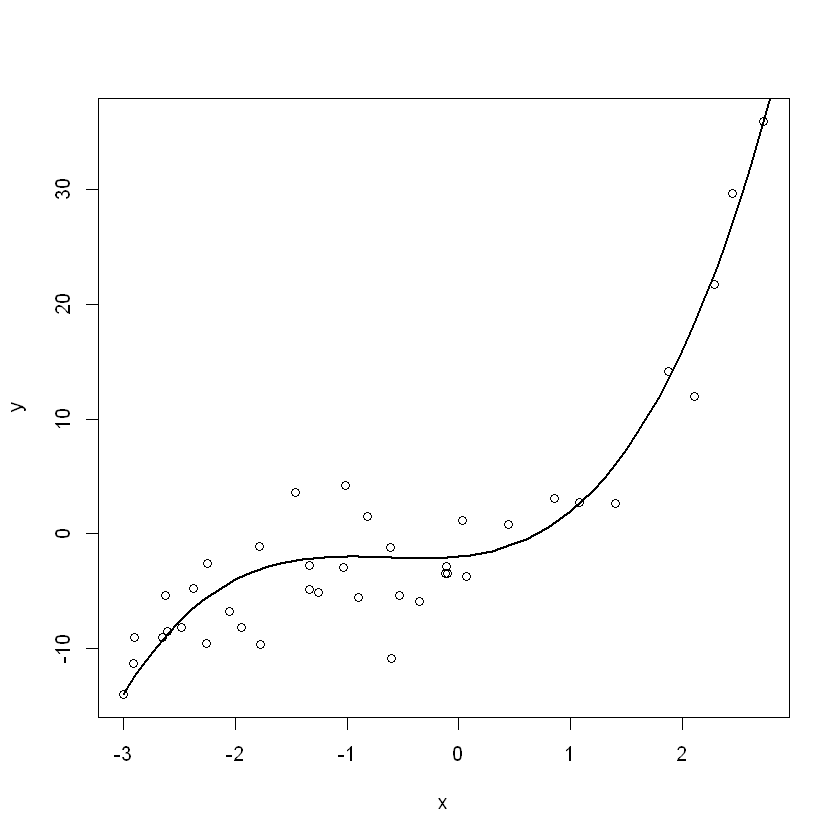

In [28]:
# 1.1
f = function(x, alpha, sigma){
    p = length(alpha) - 1
    n = length(x)
    y = rnorm(n = n, mean = 0, sd = sigma)
    for(i in 0:p){
        y = y + alpha[i+1]*x^i
    }
    return(y)
}

# 1.2
x = runif(40, min = -3, max = 3)
alpha = c(-2, 1, 2, 1)
sigma = 4
y = f(x, alpha, sigma)

# Función x^3 + 2 x^2 - x - 2
fx = seq(-3,3, by = 0.1)
fy = f(fx, alpha, 0)

# Ploteamos
plot(x,y)
lines(fx, fy, lwd = 2)

## 2.
Diseñar la matriz de covariables de la regresión o features $X$, que tendrá tantas filas como observaciones y columnas como `p+1`. Para ello, crea una función cuyos argumentos de entrada sean el vector `x` con la variable independiente y el grado del polinomio `p` con el que se desea ajustar los datos.

In [29]:
XMatrix = function(x, p){
    X = rep(1, length(x))
    for(i in 1:p){
       X = cbind(X, x^i)
    }
    return(X)
}

p = length(alpha)-1
X = XMatrix(x, p)

## 3.
Calcula el valor mínimo de la función de coste (_loss_, RSS) para el caso en que hacemos un ajuste con una recta (dos parámetros), una parábola (tres parámetros), 4, 5, 6 y 7 parámetros sin considerar la regularización, es decir, resolviendo $ (X^tX)\beta = X^ty$, usando los primeros 20 puntos. Con los valores de $\beta$ que hacen mínimo el RSS para la muestra de entrenamiento, calcula el RSS para los otros 20 puntos. Representa los resultados en función del número de parámetros para ambos casos.

In [34]:
beta = matrix(data = 0, nrow = 6, ncol = 7-2)
for(p in 2:7){
    X = XMatrix(x, p)
    beta[,p-2] = solve(t(X) %*% X, t(X) %*% y)
}
beta

ERROR: Error in beta[, p - 2] <- solve(t(X) %*% X, t(X) %*% y): número de items para para sustituir no es un múltiplo de la longitud del reemplazo


In [32]:
solve(t(X) %*% X, t(X) %*% y)

X,-2.31950209
,1.70818239
,1.34662953
,0.62238013
,0.11187731
,0.03785416


## 4.
Escribe una función de R que encuentre el mínimo de la función de coste para el caso de la regularización L2, es decir, resolviendo $(X^tX+\lambda I)\beta = X^ty$. El parámetro lambda será pasado como entrada a esta función. Utilízala para estimar las curvas que mejor ajustan para los casos:
  * 3 parámetros, lambda=0
  * 10 parámetros, lambda=0
  * 10 parámetros, lambda=1000

Representa todas las curvas juntas y escribe tus conclusiones. 

## 5.
Utiliza la función anterior para representar el valor de los parámetros del modelo en función de $\lambda$, dando valores a $\lambda$ entre $0.001$ y $10000$. Prueba a representar la evolución de los coeficientes de un modelo de 11 parámetros (usando una escala logarítmica para lambda).